# CD7: full spectrum dimensionality reduction of neutrophils

In this notebook, we perform a clustering analysis of the CD7 data on features extracted from SCIP.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# %load ../common_.py
import sys
sys.path.append("..")
from common import *

In [3]:
from sklearn.feature_selection import VarianceThreshold
import anndata
import scanpy
scanpy.settings.verbosity = 3

In [4]:
data_dir = Path("/data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/results/scip/202203221745/")

In [60]:
df = pq.read_table(data_dir / "features.parquet").to_pandas()
df = df[numpy.load(data_dir / "indices/columns.npy", allow_pickle=True)]

df = df.set_index(["meta_panel", "meta_replicate", "meta_P", "meta_id"])
df = df.loc["D"]
df = df.loc[numpy.load(data_dir / "neutrophils.npy", allow_pickle=True)]
df = df.sort_index()

In [61]:
df.shape

(18914, 1140)

In [62]:
obs = df.filter(regex='meta').reset_index()
obs.index = df.index
adata = anndata.AnnData(df.filter(regex="feat").astype(numpy.float32), obs=obs)

In [63]:
adata.obs["meta_replicate"] = adata.obs["meta_replicate"].astype("category")

In [64]:
scanpy.pp.scale(adata)

In [65]:
scanpy.tl.pca(adata, svd_solver='arpack')

computing PCA
    with n_comps=50
    finished (0:00:01)


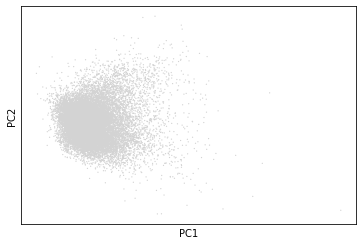

In [66]:
scanpy.pl.pca(adata)

In [67]:
scanpy.pp.neighbors(adata, n_neighbors=30)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:06)


In [68]:
scanpy.tl.leiden(adata)

running Leiden clustering
    finished: found 12 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:14)


In [69]:
scanpy.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:20)


In [70]:
markers = [col for col in adata.var.index if col.startswith("feat_sum")]

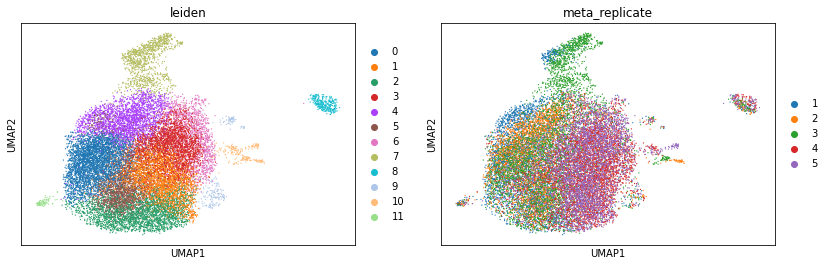

In [72]:
scanpy.pl.umap(adata, color=["leiden", "meta_replicate"])

In [73]:
from sklearn.feature_selection import mutual_info_classif

In [75]:
mi = mutual_info_classif(X=adata.X, y=adata.obs["meta_replicate"], n_neighbors=10, random_state=0)

In [79]:
adata.var_names[numpy.argsort(mi)[::-1]]

Index(['feat_combined_edge_mean_Bright', 'feat_bgcorr_edge_mean_Bright',
       'feat_edge_mean_Bright', 'feat_combined_bgcorr_edge_mean_Bright',
       'feat_edge_sum_Bright', 'feat_combined_edge_sum_Bright',
       'feat_combined_bgcorr_edge_sum_Bright', 'feat_bgcorr_edge_sum_Bright',
       'feat_combined_bgcorr_edge_median_Bright',
       'feat_combined_edge_median_Bright',
       ...
       'feat_moments_hu-1_combined',
       'feat_combined_glcm_std_homogeneity_3_APC', 'feat_glcm_std_ASM_5_RPe',
       'feat_sobel_max_RPe', 'feat_combined_glcm_mean_homogeneity_3_APC',
       'feat_moments_hu-6_DAPI', 'feat_combined_glcm_mean_contrast_3_RPe',
       'feat_combined_glcm_std_dissimilarity_5_APC', 'feat_moments_hu-4_DAPI',
       'feat_combined_glcm_std_energy_3_Oblique'],
      dtype='object', length=1126)

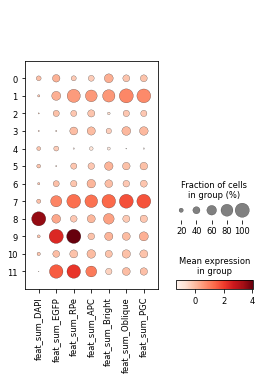

In [57]:
scanpy.pl.dotplot(adata, markers, groupby='leiden')

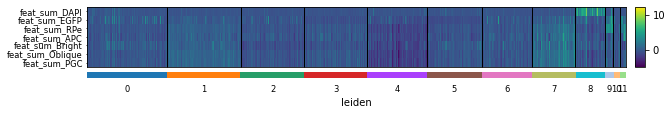

In [58]:
scanpy.pl.heatmap(adata, markers, groupby='leiden', swap_axes=True)

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden']`


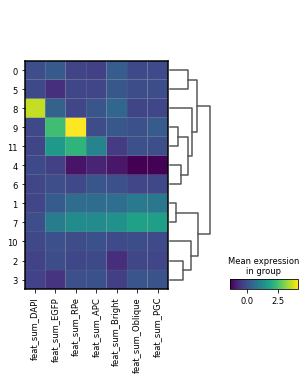

In [59]:
scanpy.pl.matrixplot(adata, markers, groupby='leiden', dendrogram=True)